In [64]:
!pip install pandas-gbq --quiet
!pip install seaborn --quiet

In [65]:
import pandas as pd
import seaborn as sns
from pandas_gbq import read_gbq

In [3]:
#Extração dos dados utilizando SQL
query = """
    SELECT *
    FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015
    LIMIT 1000
"""
df = read_gbq(query, dialect='standard', project_id='curso-ebac-466117')
df.head()

Downloading: 100%|██████████|


,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,30,Montana,300019,5,5,0,0,0,7,7,...,45,0,None,0,None,0,None,1,0,2015-03-28 14:58:00+00:00
1,39,Ohio,390099,7,7,0,0,0,15,15,...,24,27,Backup Due to Prior Crash,0,None,0,None,1,0,2015-02-14 11:19:00+00:00
2,49,Utah,490123,16,16,0,0,0,28,28,...,99,0,None,0,None,0,None,1,0,2015-04-14 12:24:00+00:00
3,48,Texas,481184,6,5,1,0,5,5,10,...,99,0,None,0,None,0,None,1,0,2015-05-27 16:40:00+00:00
4,41,Oregon,410333,11,11,0,0,0,14,14,...,99,0,None,0,None,0,None,1,0,2015-11-17 18:17:00+00:00


In [4]:
#Verificação de dados nulos
df.isnull().sum()

,0
state_number,0
state_name,0
consecutive_number,0
number_of_vehicle_forms_submitted_all,0
number_of_motor_vehicles_in_transport_mvit,0
...,...
related_factors_crash_level_3,0
related_factors_crash_level_3_name,0
number_of_fatalities,0
number_of_drunk_drivers,0


In [5]:
#Tratamento e exploração de dados
df.describe()

df.info()

df['number_of_drunk_drivers'].value_counts() #análise de uma possível coluna de interesse

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 70 columns):
 #   Column                                                       Non-Null Count  Dtype              
---  ------                                                       --------------  -----              
 0   state_number                                                 1000 non-null   Int64              
 1   state_name                                                   1000 non-null   object             
 2   consecutive_number                                           1000 non-null   Int64              
 3   number_of_vehicle_forms_submitted_all                        1000 non-null   Int64              
 4   number_of_motor_vehicles_in_transport_mvit                   1000 non-null   Int64              
 5   number_of_parked_working_vehicles                            1000 non-null   Int64              
 6   number_of_forms_submitted_for_persons_not_in_motor_vehicles  1000 non-nul

,count
number_of_drunk_drivers,
0,737
1,260
2,3


In [63]:
#Perguntas de negócios e suas respostas com agrupamento e ordenação
print('Qual o estado com maior número de acidentes? ')
# Criar um novo DataFrame agrupado e ordenado
df['max_acidentes'] = df.groupby('state_name')['consecutive_number'].transform('count')
df_ordenado = df.sort_values(by='max_acidentes', ascending=False)
display(df_ordenado[['state_name', 'max_acidentes']].head(1))


print('\n\n Qual o estado com menor número de acidentes? ')
#Reposta com novo DataFrame agrupado e ordenado
df['min_acidentes'] = df.groupby('state_name')['consecutive_number'].transform('count')
df_ordenado = df.sort_values(by='min_acidentes', ascending=True)
display(df_ordenado[['state_name', 'min_acidentes']].head(1))

Qual o estado com maior número de acidentes? 


,state_name,max_acidentes
960,Texas,93




 Qual o estado com menor número de acidentes? 


,state_name,min_acidentes
967,Hawaii,1


In [61]:
#Perguntas de negócios e suas respostas com agrupamento e ordenação
print('Qual o estado com maior número de motoristas bêbados? ')
# Criar um novo DataFrame agrupado e ordenado
df['max_drunks'] = df.groupby('state_name')['number_of_drunk_drivers'].transform('sum')
df_ordenado = df.sort_values(by='max_drunks', ascending=False)
display(df_ordenado[['state_name', 'max_drunks']].head(1))

print('\n\n Qual o estado com menor número de motoristas bêbados? ')
# Criar um novo DataFrame agrupado e ordenado
df['min_drunks'] = df.groupby('state_name')['number_of_drunk_drivers'].transform('sum')
df_ordenado = df.sort_values(by='min_drunks', ascending=True)
display(df_ordenado[['state_name', 'min_drunks']].head(1))

Qual o estado com maior número de motoristas bêbados? 


,state_name,max_drunks
960,Texas,23




 Qual o estado com menor número de motoristas bêbados? 


,state_name,min_drunks
19,Delaware,0


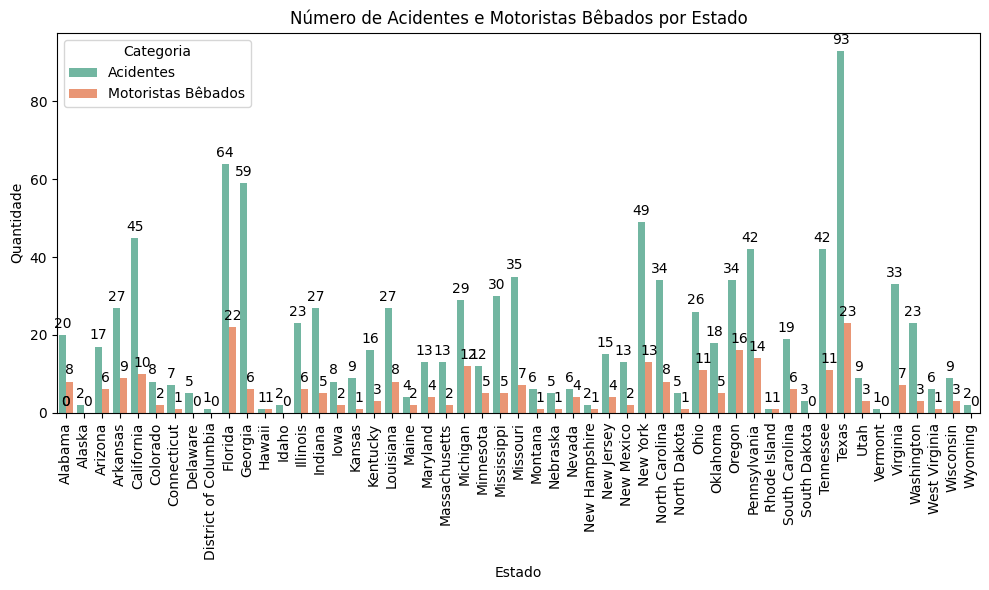

In [70]:
import matplotlib.pyplot as plt
# 1. Agrupar dados por estado
dados_por_estado = df.groupby('state_name').agg({
    'consecutive_number': 'count',  # número de acidentes
    'number_of_drunk_drivers': 'sum'  # total de motoristas bêbados
}).reset_index()

# 2. Transformar em formato "long" para o Seaborn
dados_long = pd.melt(
    dados_por_estado,
    id_vars='state_name',
    value_vars=['consecutive_number', 'number_of_drunk_drivers'],
    var_name='Categoria',
    value_name='Quantidade'
)

# 3. Melhorar legenda
dados_long['Categoria'] = dados_long['Categoria'].replace({
    'consecutive_number': 'Acidentes',
    'number_of_drunk_drivers': 'Motoristas Bêbados'
})

# 4. Plotar gráfico
plt.figure(figsize=(10,6))
grafico = sns.barplot(data=dados_long, x='state_name', y='Quantidade', hue='Categoria', palette='Set2')

# 5. Título e ajustes
plt.title('Número de Acidentes e Motoristas Bêbados por Estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade')

# 6. Adicionar rótulos nas barras
for p in grafico.patches:
    grafico.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 8),
        textcoords='offset points'
    )

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()